# Denoising with the deep decoder

The code below demonstrates by fitting the deep decoder to 100 images in the folder ./imgs/, containing 100 random images from imagenet, that images are fitted faster than noise.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
#%matplotlib notebook

import os

import warnings
warnings.filterwarnings('ignore')

from include import *
from PIL import Image
import PIL

import numpy as np
import torch
import torch.optim
from torch.autograd import Variable

from os import listdir
from os.path import isfile, join

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    dtype = torch.cuda.FloatTensor
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor


num GPUs 1


## Get imagenet images

In [2]:
def get_imgnet_imgs(path = './imgs/'):
    siz = 512
    imgs = []
    imgnames = [f for f in listdir(path) if isfile(join(path, f))]   
    for imgname in imgnames:
        # prepare and select image
        imgname = path + imgname

        img = load_and_crop(imgname,target_width=512,target_height=512)
        if img is None: # then the image could not be croped to 512x512
            continue
        
        img_np = pil_to_np(img)

        if img_np.shape[0] != 3: # we only want to consider color images
            continue
        imgs += [img_np]
    print("got ", len(imgs), " images")
    return imgs

imgs = get_imgnet_imgs()

imgs = imgs[:25]

got  100  images


In [3]:
def myimgshow(plt,img):
    if(img.shape[0] == 1):
        plt.imshow(np.clip(img[0],0,1),cmap='Greys',interpolation='none')
    else:
        plt.imshow(np.clip(img.transpose(1, 2, 0),0,1),interpolation='none')   

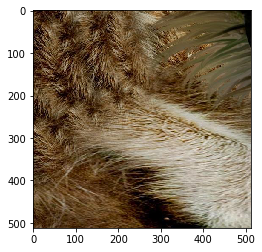

In [4]:
myimgshow(plt,imgs[1])
plt.show()

## Functions to generate noisy image, noise, and checkerboard

In [5]:
numit = 10000

## Fit imagenet images

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


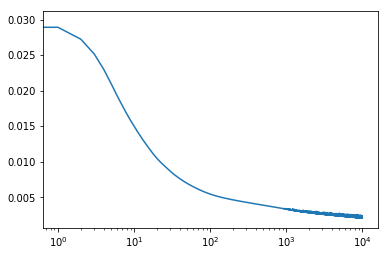

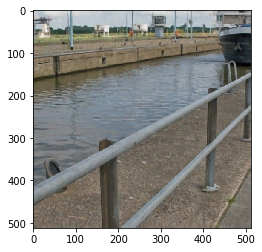

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


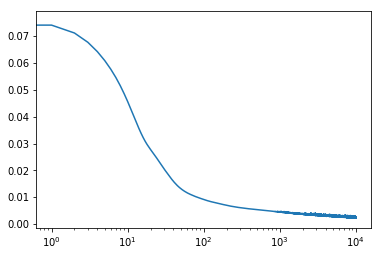

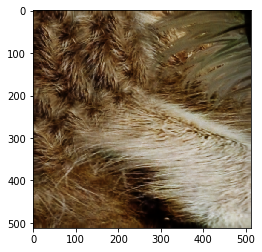

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


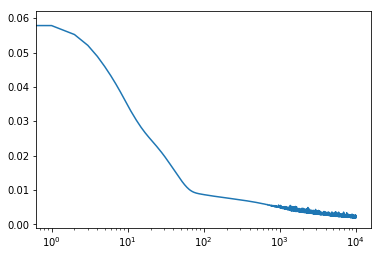

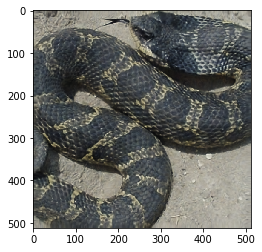

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


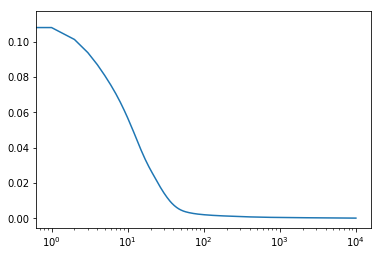

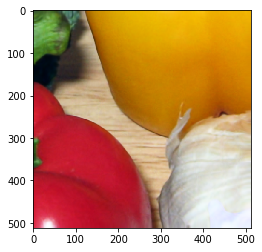

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


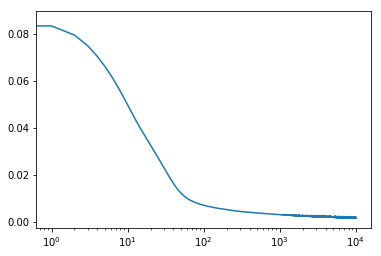

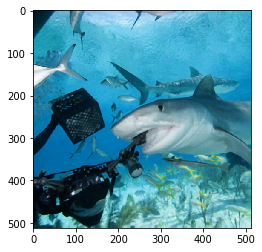

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


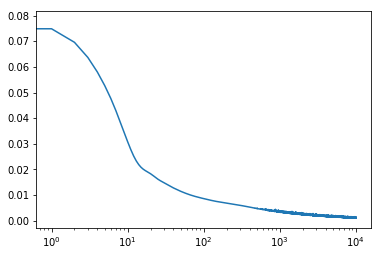

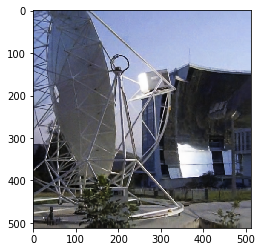

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


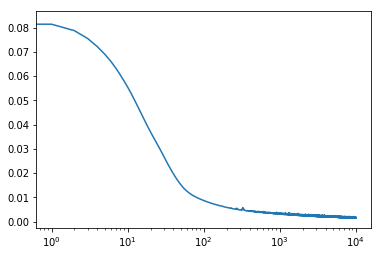

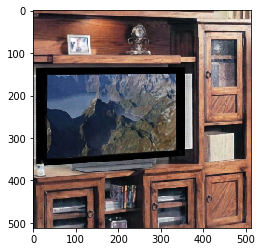

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


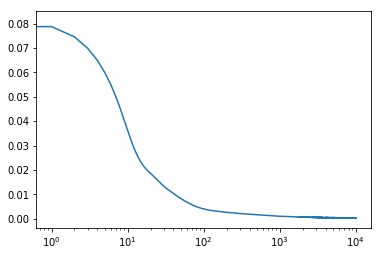

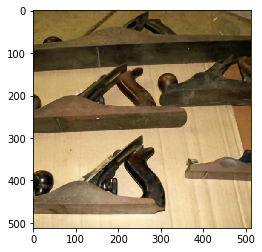

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


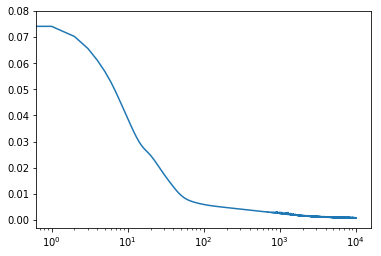

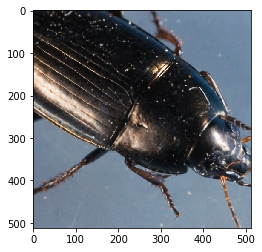

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


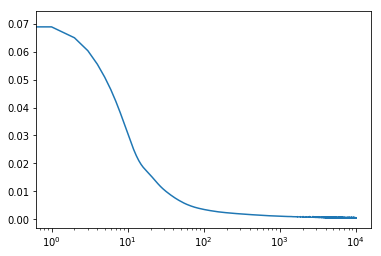

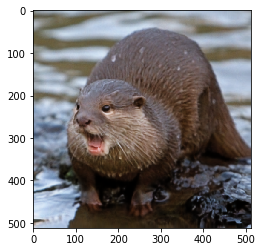

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


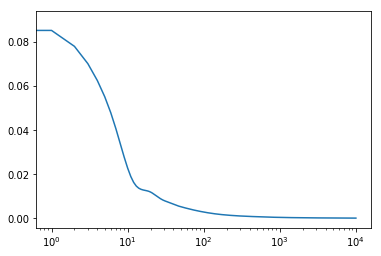

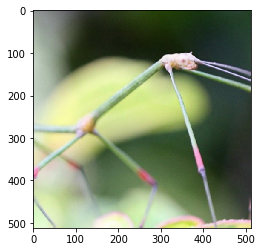

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


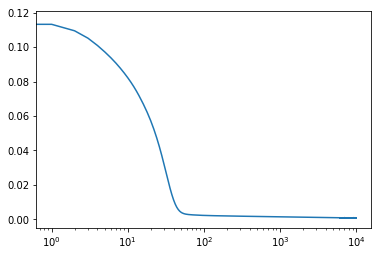

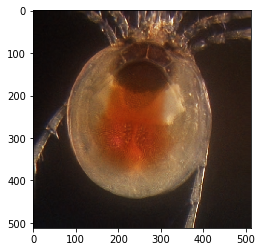

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


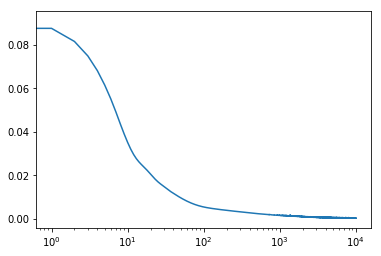

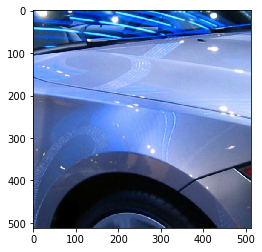

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


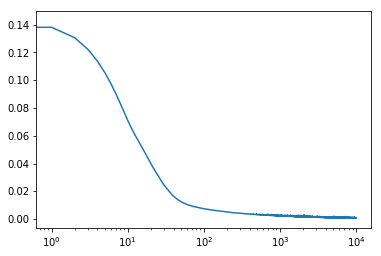

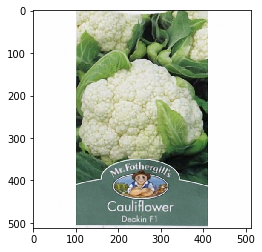

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


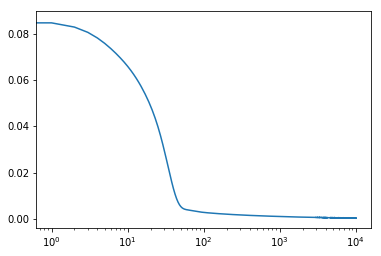

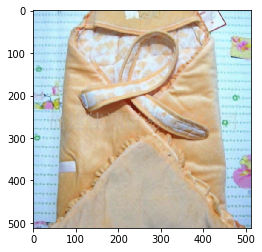

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


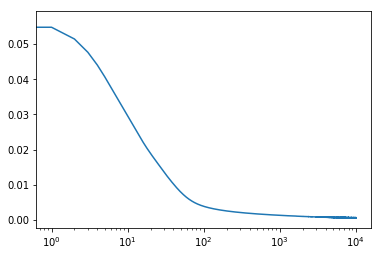

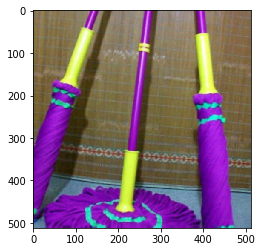

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


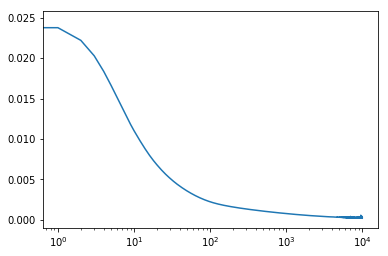

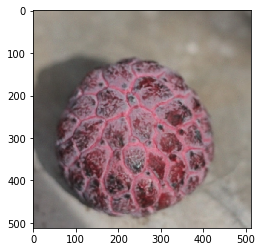

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


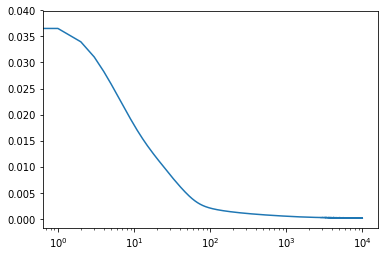

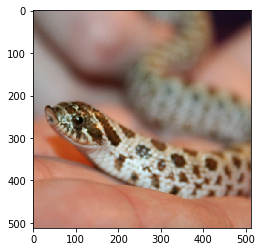

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


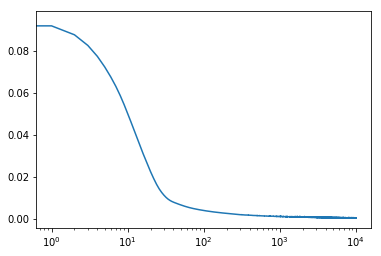

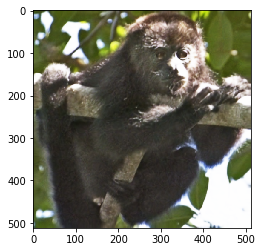

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


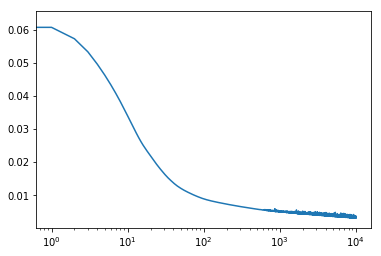

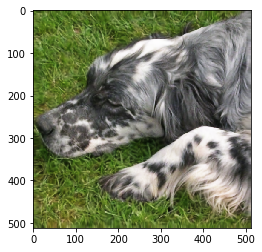

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


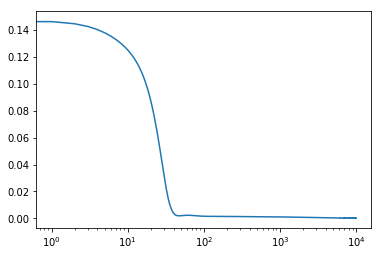

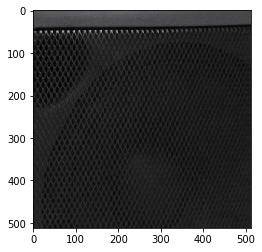

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


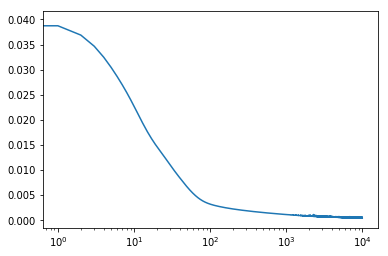

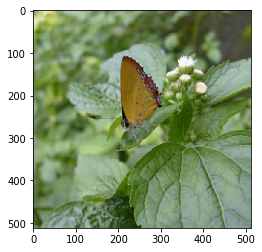

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


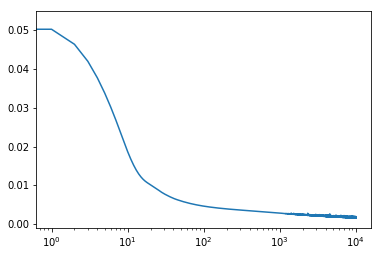

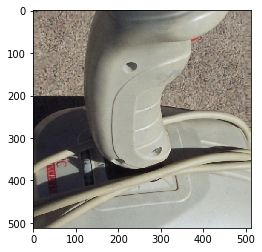

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


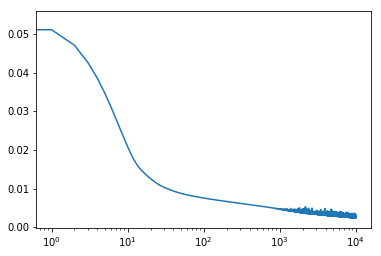

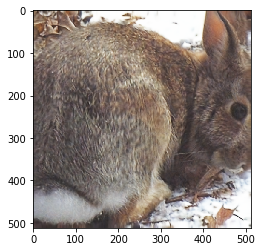

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


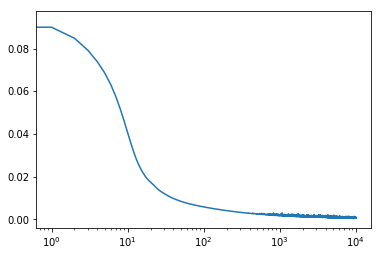

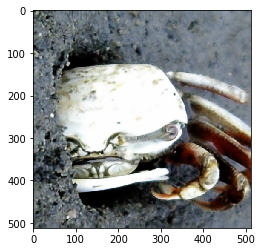

In [6]:
mses = []

for img in imgs:
    img_var = np_to_var(img).type(dtype)
    num_channels = [256]*5
    net = decodernw(img.shape[0],num_channels_up=num_channels).type(dtype)
    mse_n, mse_t, ni, net, out_grads = fit( num_channels=num_channels,
                        num_iter=numit,
                        img_noisy_var=img_var,
                        net=net,
                        img_clean_var=img_var,
                        output_gradients=True,
                        OPTIMIZER = 'SGD', LR = 0.1
                        )
    out_img_np = net(ni.type(dtype)).data.cpu().numpy()[0]
    plt.semilogx(mse_n)
    plt.show()
    myimgshow(plt, out_img_np )
    plt.show()
    
    mses += [mse_n]

In [7]:
MSEs = np.array(mses)
A = np.array( [np.mean(MSEs,axis=0),np.std(MSEs,axis=0) ])
savemtx_for_logplot(A,"imgnetcurve_av.dat")
savemtx_for_logplot(MSEs,"imgnetcurve_sig.dat")

## Fit noisy only

In [8]:
def get_noisy_img(shape):
    noise = np.random.rand( shape[1], shape[2] )
    noise = np.array( [noise]*shape[0] )
    return noise

nmses = []

for img in imgs:
    img_var = np_to_var( get_noisy_img(img.shape) ).type(dtype)
        
    img_var.data.uniform_()
    img_var.data *= 9./10
    
    num_channels = [256]*5
    net = decodernw(img.shape[0],num_channels_up=num_channels).type(dtype)
    mse_n, mse_t, ni, net, out_grads = fit( num_channels=num_channels,
                        num_iter=numit,
                        img_noisy_var=img_var,
                        net=net,
                        img_clean_var=img_var,
                        output_gradients=True,
                        OPTIMIZER = 'SGD', LR = 0.1
                        )
    nmses += [mse_n]

input shape:  [1, 256, 16, 16]
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059681  Actual loss 0.059681 Actual loss orig 0.059681 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059901  Actual loss 0.059901 Actual loss orig 0.059901 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059725  Actual loss 0.059725 Actual loss orig 0.059725 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.058897  Actual loss 0.058897 Actual loss orig 0.058897 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059455  Actual loss 0.059455 Actual loss orig 0.059455 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059564  Actual loss 0.059564 Actual loss orig 0.059564 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059728  Actual loss 0.059728 Actual loss orig 0.059728 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059443  Actual loss 0.059443 Actual loss orig 0.059443 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059895  Actual loss 0.059895 Actual

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



input shape:  [1, 256, 16, 16]0.059587  Actual loss 0.059587 Actual loss orig 0.059587 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.059868  Actual loss 0.059868 Actual loss orig 0.059868 
optimize with SGD 0.1
input shape:  [1, 256, 16, 16]0.060158  Actual loss 0.060158 Actual loss orig 0.060158 
optimize with SGD 0.1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
nMSEs = np.array(nmses)
A = np.array( [np.mean(nMSEs,axis=0),np.std(nMSEs,axis=0) ])
savemtx_for_logplot(A,"imgnetcurve_noise_av.dat")
savemtx_for_logplot(nMSEs,"imgnetcurve_noise.dat")

In [10]:
nMSEs

array([[0.07625653, 0.07594858, 0.07541469, ..., 0.05976348, 0.05934803,
        0.05917624],
       [0.07556017, 0.07530011, 0.07483787, ..., 0.06023913, 0.06014119,
        0.05962174],
       [0.07591013, 0.07564367, 0.07517128, ..., 0.05932402, 0.05937071,
        0.05952853],
       ...,
       [0.0748692 , 0.07466983, 0.07431826, ..., 0.0590963 , 0.05932343,
        0.05957627],
       [0.07700002, 0.07665208, 0.07604208, ..., 0.05983404, 0.05980448,
        0.05968091],
       [0.07685896, 0.07653037, 0.07595145, ..., 0.0595414 , 0.05935059,
        0.05926859]])

In [11]:
img = imgs[0]
img_var = np_to_var( get_noisy_img(img.shape) ).type(dtype)
        
img_var.data.uniform_()
img_var.data *= 9./10
    
num_channels = [256]*5
net = decodernw(img.shape[0],num_channels_up=num_channels).type(dtype)
mse_n, mse_t, ni, net, out_grads = fit( num_channels=num_channels,
                        num_iter=100000,
                        img_noisy_var=img_var,
                        net=net,
                        img_clean_var=img_var,
                        output_gradients=True,
                        OPTIMIZER = 'SGD', LR = 0.1
                        )


input shape:  [1, 256, 16, 16]
optimize with SGD 0.1


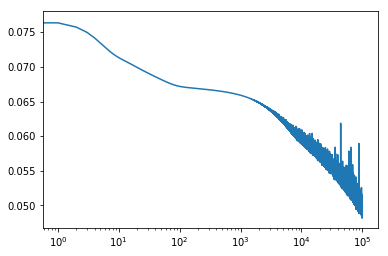

In [13]:
plt.semilogx(mse_n)